## Seeding for Reproducibility

In [ ]:
#Set seeds for reproducibility

import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

##Importing Dependencies

In [ ]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

## Data Curation

In [ ]:
!pip install kaggle

In [ ]:
# creating a dictionary
kaggle_credentails = json.load(open("kaggle.json"))

In [ ]:
# setup Kaggle API ket as environment variable
os.environ['KAGGLE_USERNAME'] = kaggle_credentails["username"]
os.environ['KAGGLE_KEY'] = kaggle_credentails["key"]

In [ ]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

100% 2.04G/2.04G [01:11<00:00, 32.3MB/s]
100% 2.04G/2.04G [01:11<00:00, 30.6MB/s]


In [ ]:
!ls

kaggle.json  plantvillage-dataset.zip  sample_data


In [ ]:
# Unzip the downloaded dataset

with ZipFile("plantvillage-dataset.zip",'r') as zip_ref:
  zip_ref.extractall()

In [ ]:
print(os.listdir("plantvillage dataset"))


print(len(os.listdir("plantvillage dataset/segmented")))
print(os.listdir("plantvillage dataset/segmented")[:5])

print(len(os.listdir("plantvillage dataset/color")))
print(os.listdir("plantvillage dataset/color")[:5])

print(len(os.listdir("plantvillage dataset/grayscale")))
print(os.listdir("plantvillage dataset/grayscale")[:5])

['segmented', 'color', 'grayscale']
38
['Grape___healthy', 'Peach___Bacterial_spot', 'Apple___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Corn_(maize)___healthy']
38
['Grape___healthy', 'Peach___Bacterial_spot', 'Apple___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Corn_(maize)___healthy']
38
['Grape___healthy', 'Peach___Bacterial_spot', 'Apple___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Corn_(maize)___healthy']


Number of Different Classes = 38

In [ ]:
print(len(os.listdir("plantvillage dataset/color/Grape___healthy")))
print(os.listdir("plantvillage dataset/color/Grape___healthy")[:5])

423
['fdf4cdd9-cb41-42de-a73e-87301576fade___Mt.N.V_HL 9000.JPG', 'edaa5185-4c46-42f4-98c9-cb17830c6fcf___Mt.N.V_HL 8977.JPG', '4035c446-454c-4873-9b74-18f7ea951f78___Mt.N.V_HL 9091.JPG', 'cdbc019a-ed10-492d-9ce5-9bfa1f7f2f72___Mt.N.V_HL 9021.JPG', '9858eca1-78cb-4c9c-9286-ff52a27d7c2f___Mt.N.V_HL 9037.JPG']


Number of Individual Images in a Subdirectory

## Data Preprocessing

In [ ]:
# Dataset Path
base_dir = 'plantvillage dataset/color'

In [ ]:
image_path = '/content/plantvillage dataset/color/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG'

(256, 256, 3)


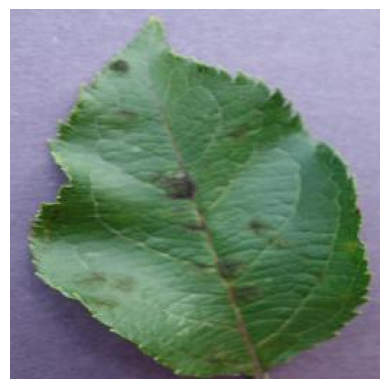

In [ ]:
# Read the image
img = mpimg.imread(image_path)

print(img.shape)

# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

In [ ]:
# Image Parameters
img_size = 224
batch_size = 32

## Train Test Split

In [ ]:
# Image Data Generators
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Use 20% of data for validation
)

In [ ]:
# Train Generator
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

Found 43456 images belonging to 38 classes.


In [ ]:
# Validation Generator
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 10849 images belonging to 38 classes.


## Convolutional Neural Network

In [ ]:
# Model Definition
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))


model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

In [ ]:
# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dense (Dense)               (None, 256)               4

In [ ]:
# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Model Training

In [ ]:
# Training the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,  # Number of steps per epoch
    epochs=7,  # Number of epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size  # Validation steps
)

Epoch 1/7
 999/1358 [=====================>........] - ETA: 21:32 - loss: 1.0713 - accuracy: 0.6918

## Model Evaluation

In [ ]:
# Model Evaluation
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Building a Predictive System

In [ ]:
# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [ ]:

# Create a mapping from class indices to class names
class_indices = {v: k for k, v in train_generator.class_indices.items()}
class_indices

In [ ]:
# saving the class names as json file
json.dump(class_indices, open('class_indices.json', 'w'))

In [ ]:
# Example Usage
image_path = '/content/test_apple_black_rot.JPG'
#image_path = '/content/test_blueberry_healthy.jpg'
#image_path = '/content/test_potato_early_blight.jpg'
predicted_class_name = predict_image_class(model, image_path, class_indices)

# Output the result
print("Predicted Class Name:", predicted_class_name)

## Save the Model into Google Drive or Local

In [ ]:
model.save('drive/MyDrive/Youtube/trained_models/plant_disease_prediction_model.h5')

In [ ]:
model.save('plant_disease_prediction_model.h5')